In [1]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read
import pandas as pd
import behav_viz.ingest as ingest
import behav_viz.visualize as viz
FIGURES_PATH = ingest.dir_utils.get_figures_path("rats", "beta_fixationgrower")

# settings
%load_ext autoreload
%autoreload 2

[2024-07-25 15:35:53,842][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-07-25 15:35:55,268][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
beta_1 = [
    "R033",
    "R039",
    "R010",
    "R012",
]
date_min = "2024-07-09"
today = datetime.today().date()
date_max = today.strftime("%Y-%m-%d")

trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_1, date_min=date_min
)
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_1, date_min=date_min, date_max=date_max, verbose=True
)

beta_2 = [
    "R034",
    "R036",
]

date_min = "2024-07-22"

trials_df2 = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_2, date_min=date_min
)
days_df2 = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_2, date_min=date_min, date_max=date_max, verbose=True
)

trials_df = pd.concat([trials_df, trials_df2])
days_df = pd.concat([days_df, days_df2])

Fetched 14 dates from Sessions table from 2024-07-09 to 2024-07-24 for R033

Fetched 15 dates from Sessions table from 2024-07-09 to 2024-07-24 for R039

Fetched 16 dates from Sessions table from 2024-07-09 to 2024-07-25 for R010

Fetched 16 dates from Sessions table from 2024-07-09 to 2024-07-25 for R012

Fetched data from SessionAggDate table from 2024-07-09 to 2024-07-24  
	Last date on the database is 2024-07-24 but user is querying data 
	for 2024-07-25. Attempting to manually aggregate today's data.
Today's, 2024-07-25, data exits and has been added to SessionAggDate.

60 daily summaries fetched for animals: 
['R033', 'R039', 'R010', 'R012']
between 2024-07-09 and 2024-07-25
Not all variables are the same length. Cannot create proper DataFrame
result: 42
hits: 42
violations: 42
temperror: 42
hit_rate: 41
error_rate: 41
violation_rate: 41
temp_error_rate: 41
n_lpokes: 41
n_cpokes: 41
n_rpokes: 41
trial_dur: 41
trial_start: 41
first_spoke: 41
first_lpoke: 41
first_rpoke: 41
n_settl

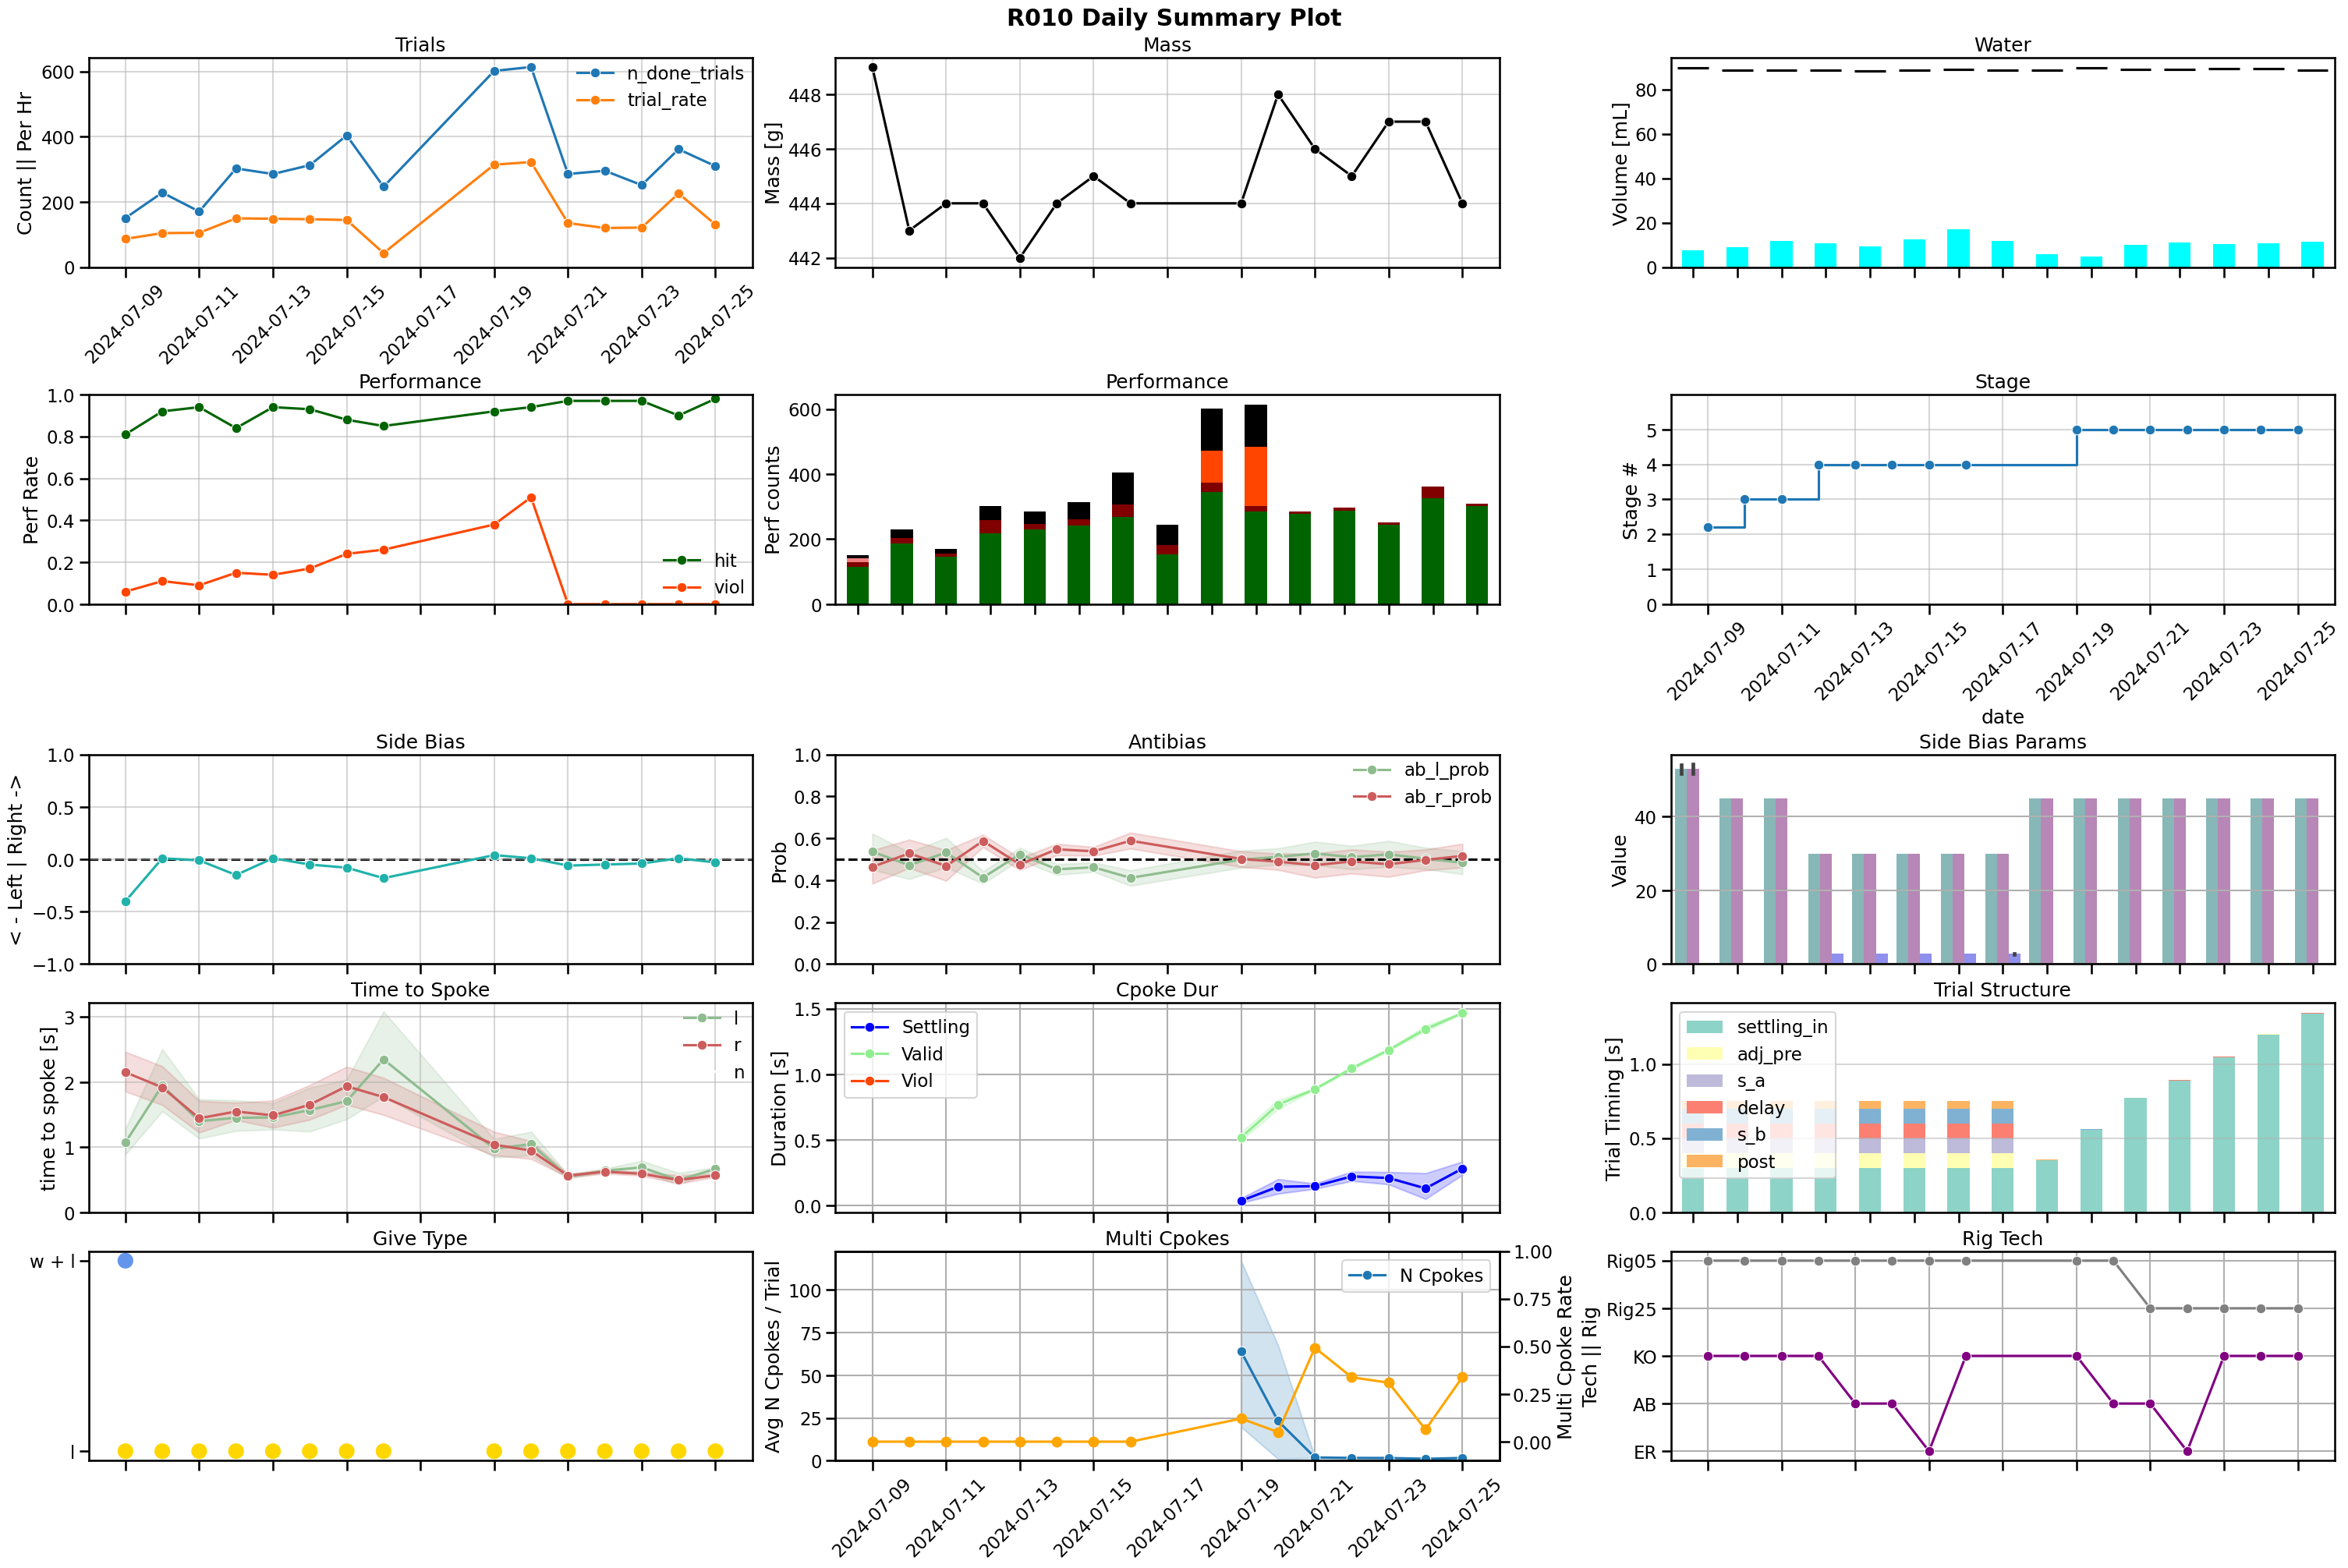

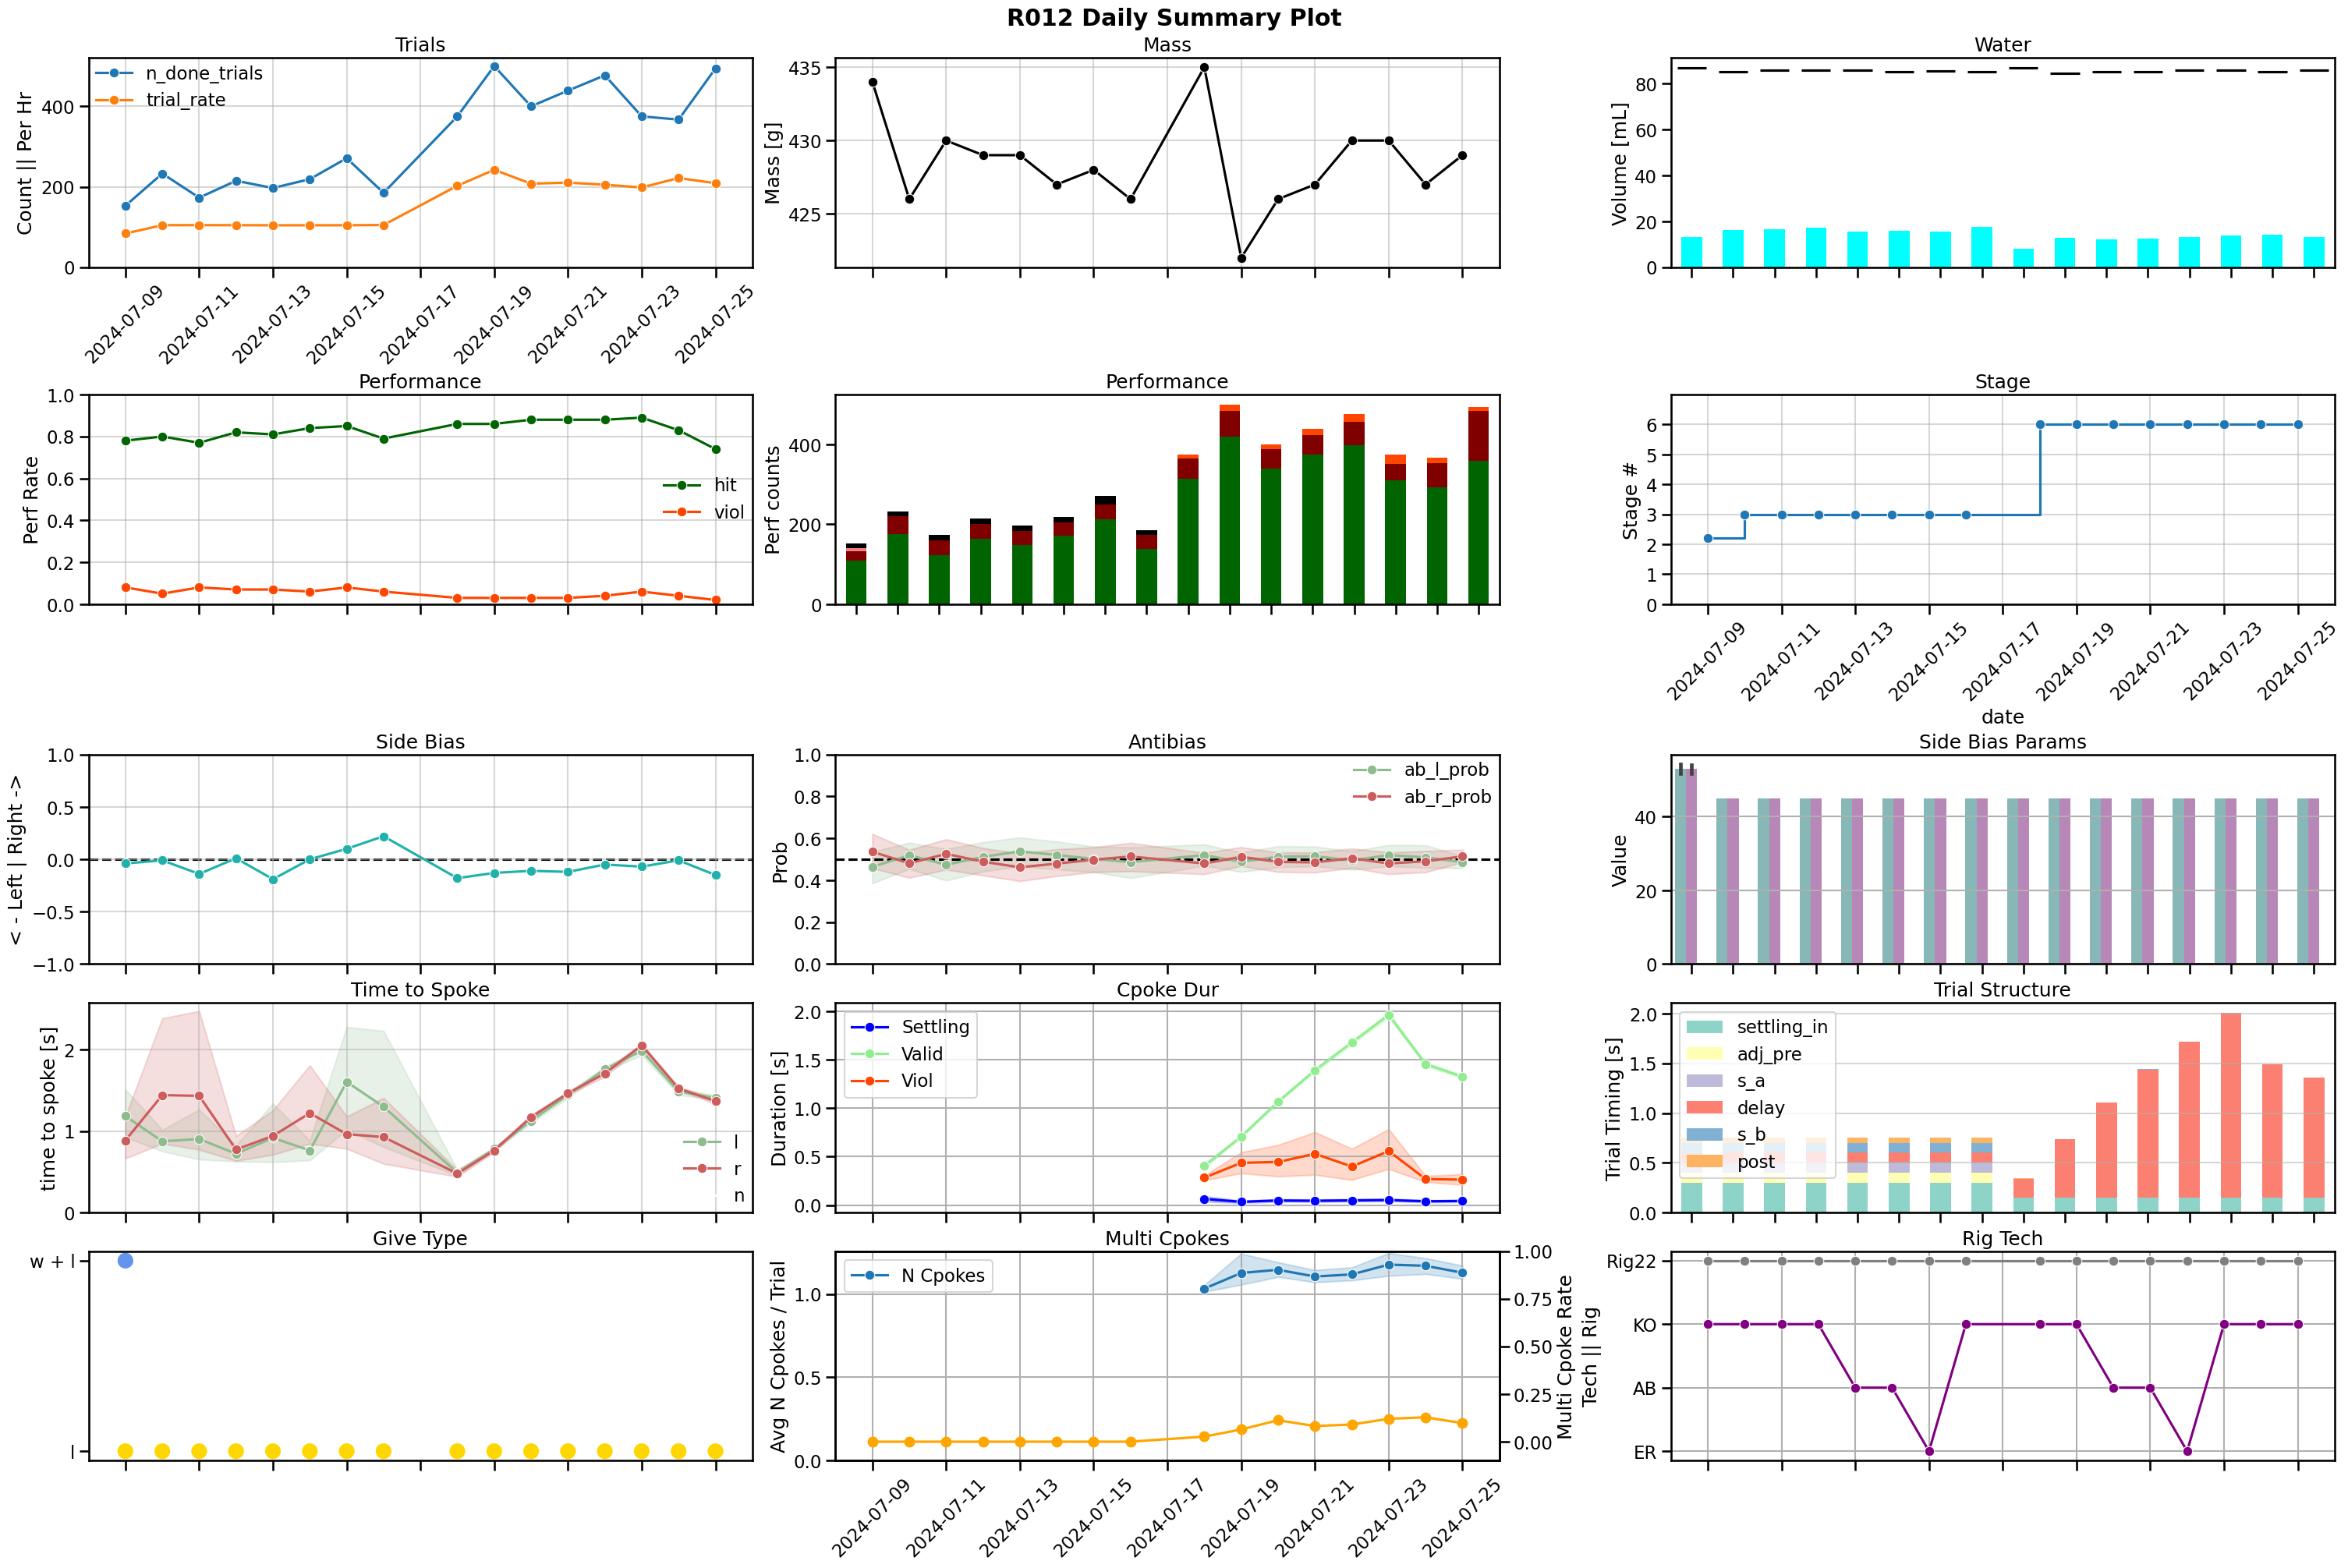

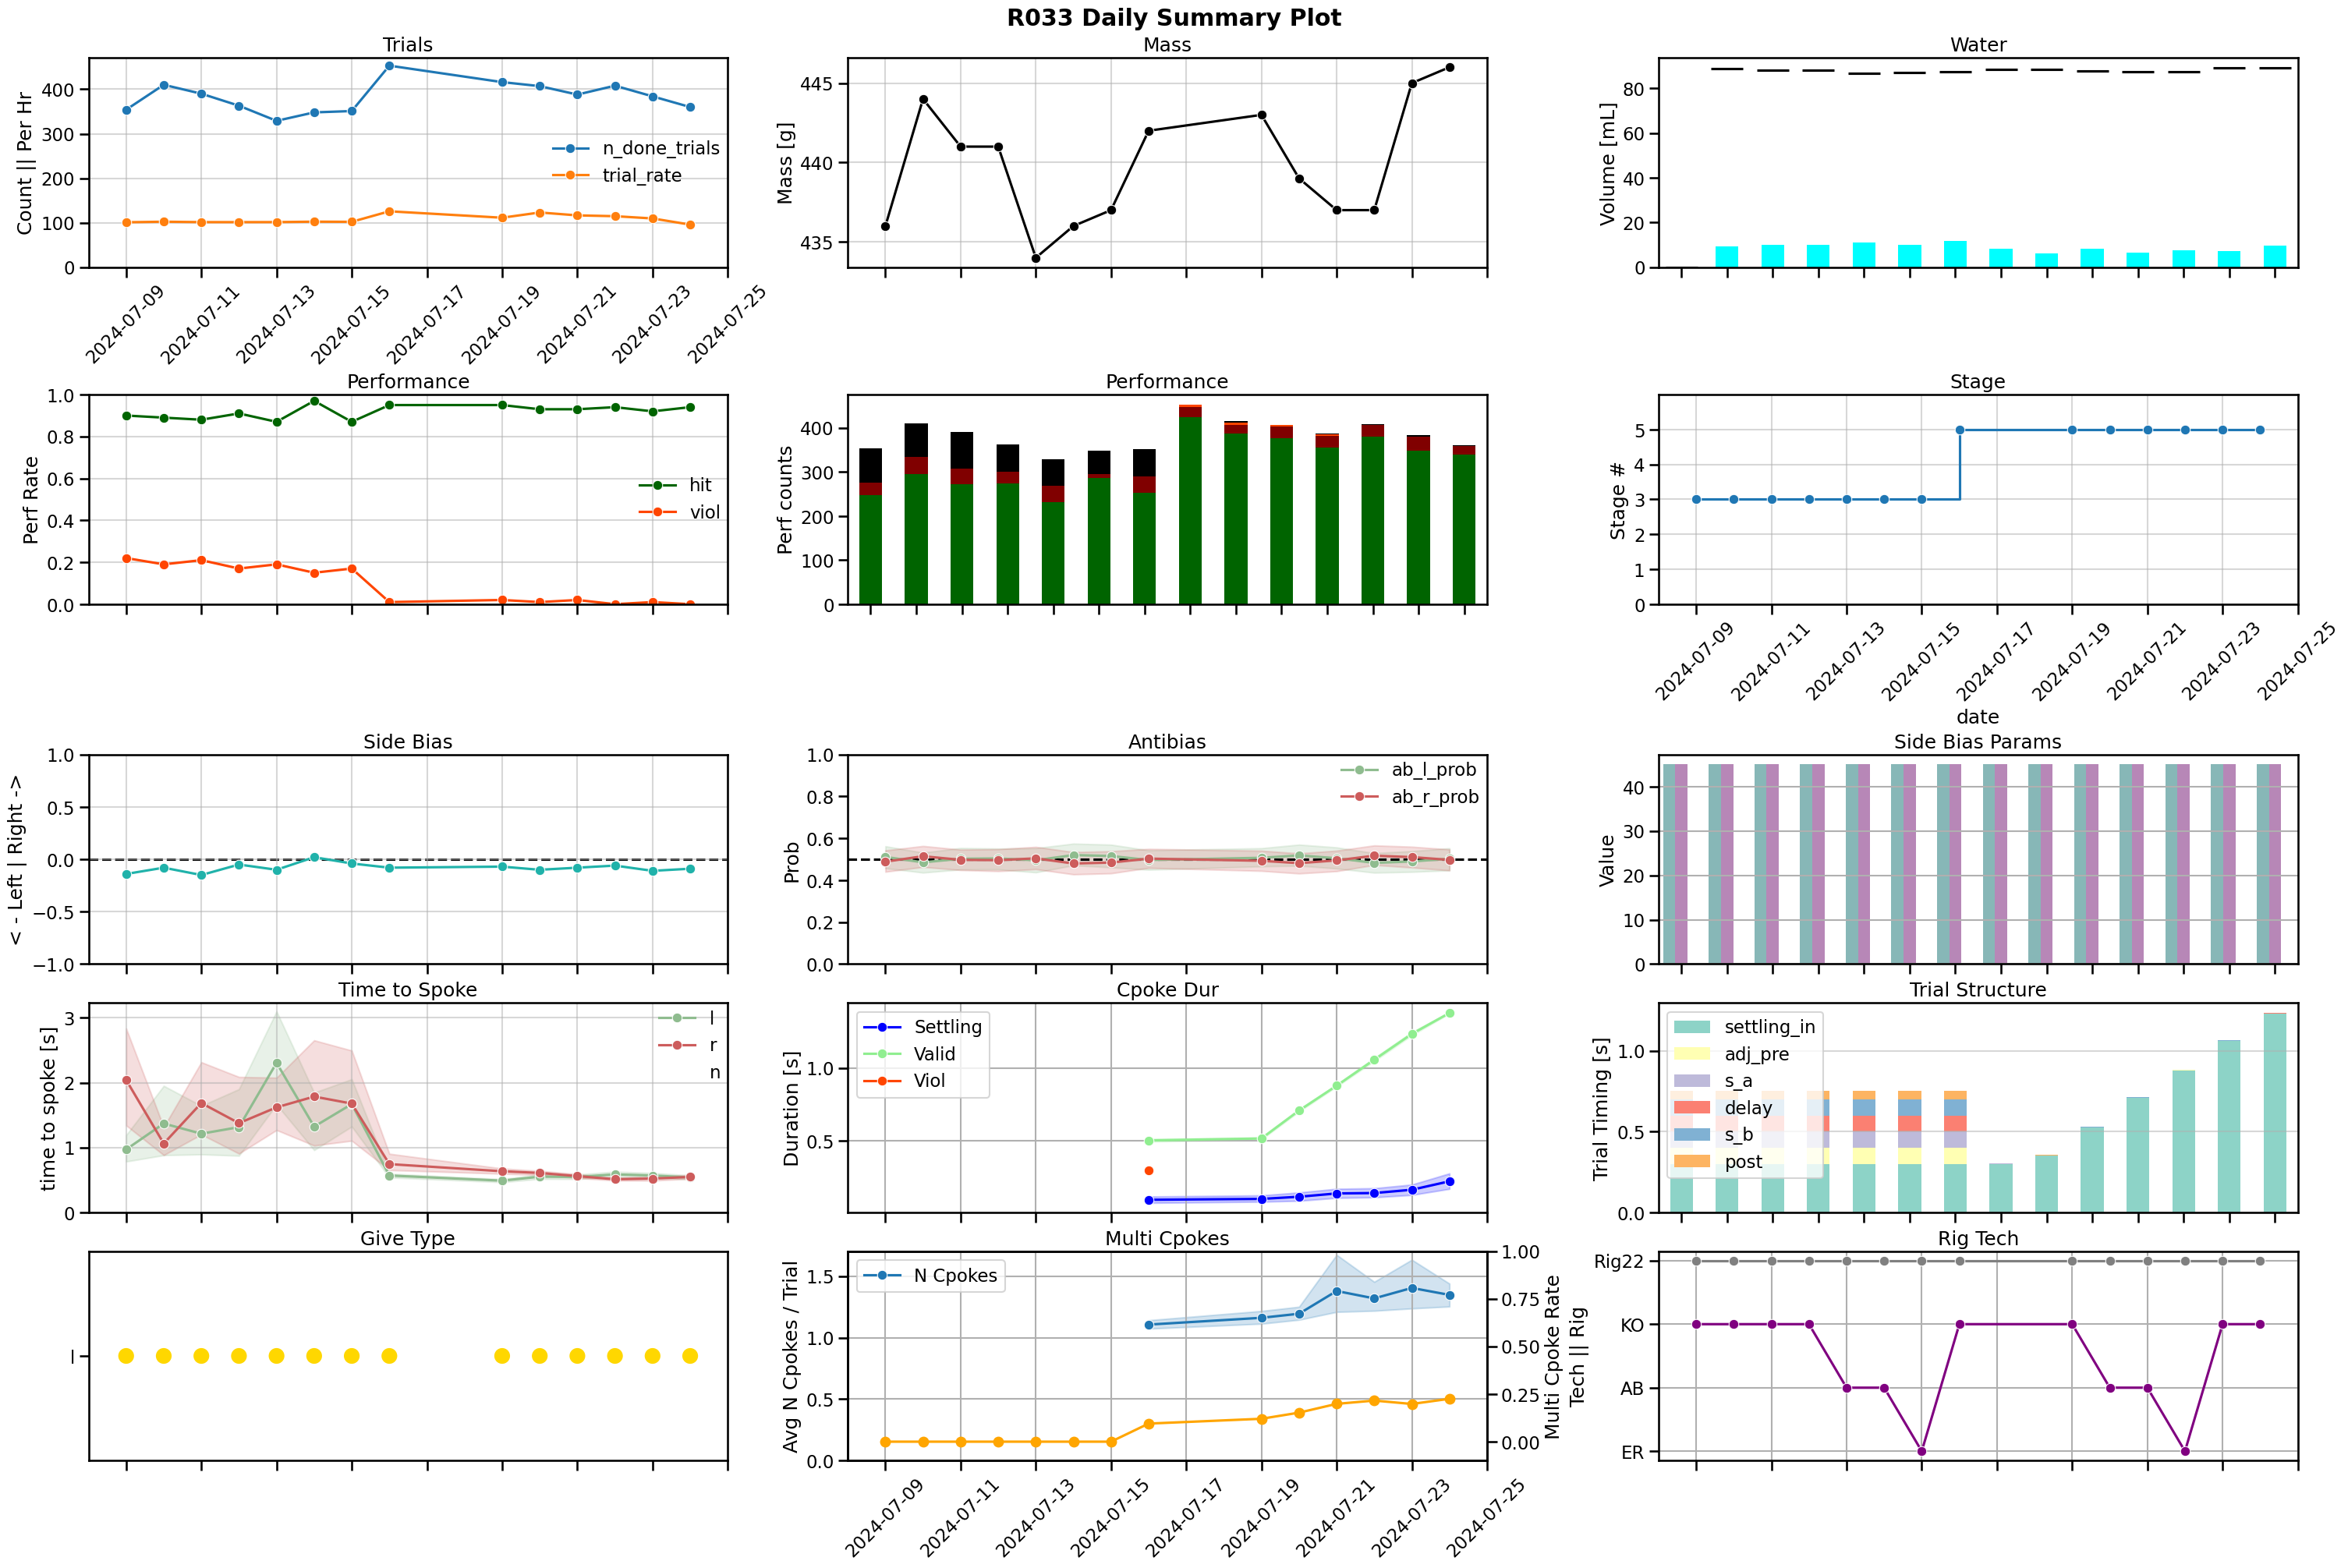

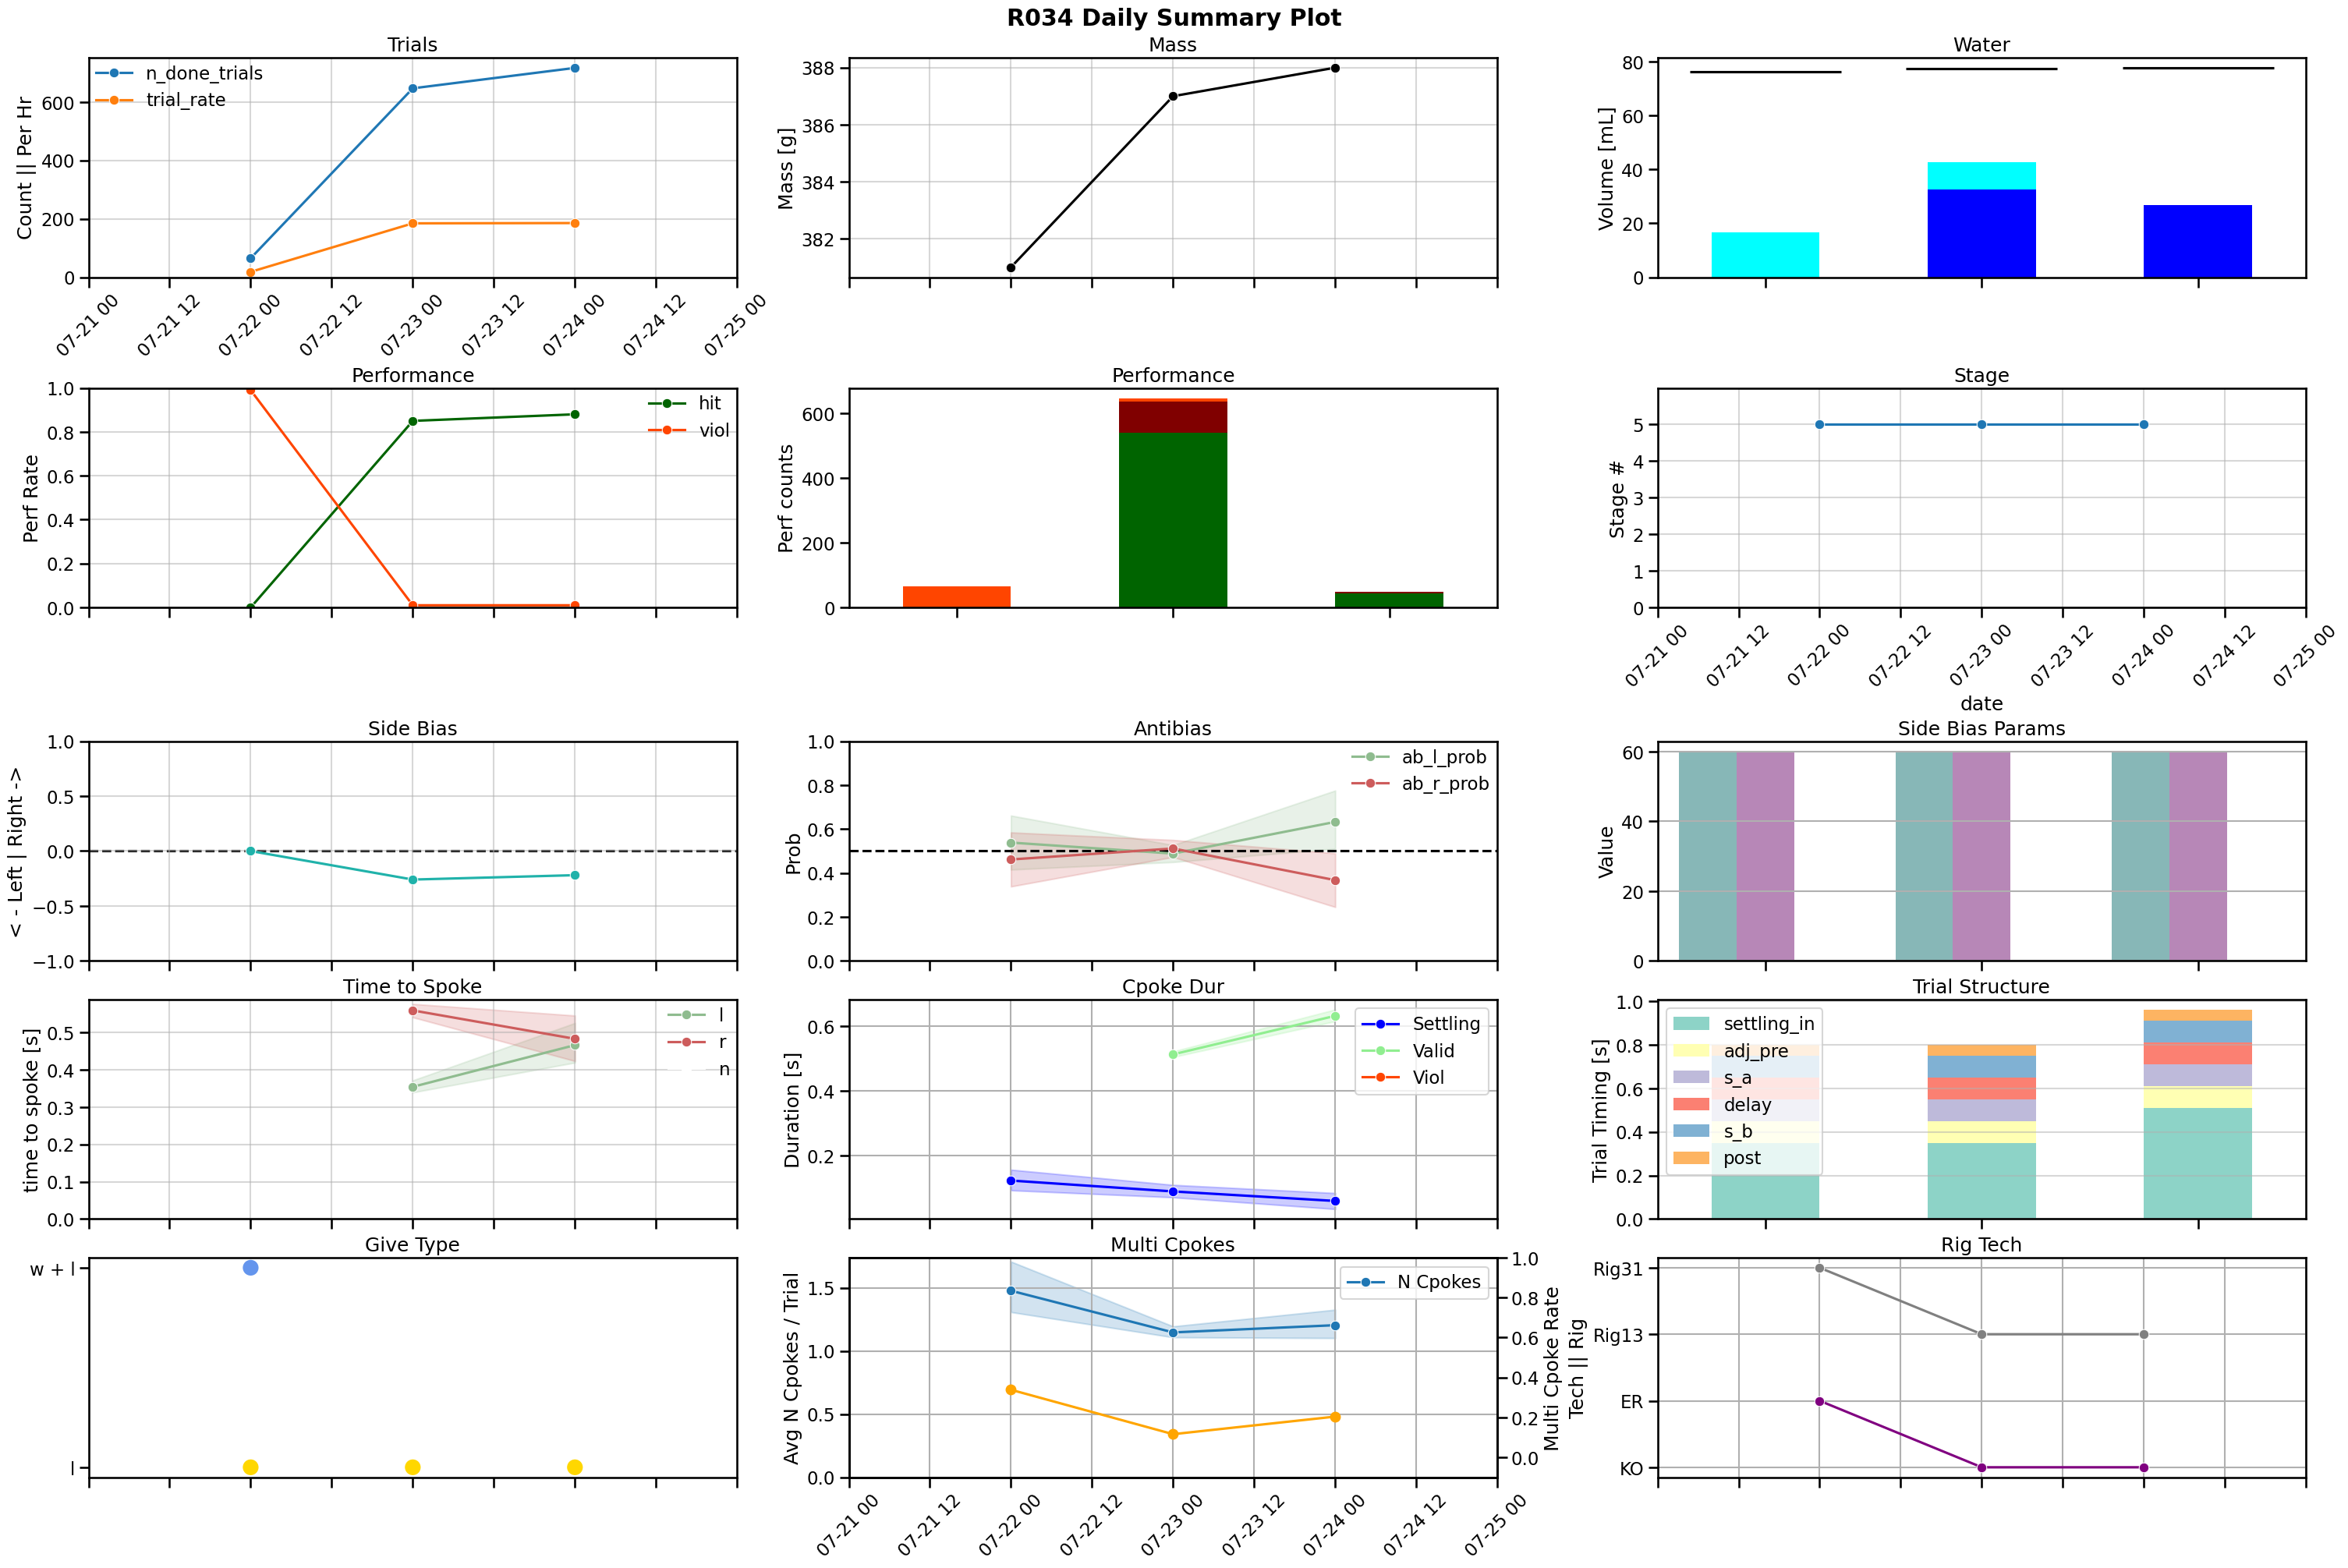

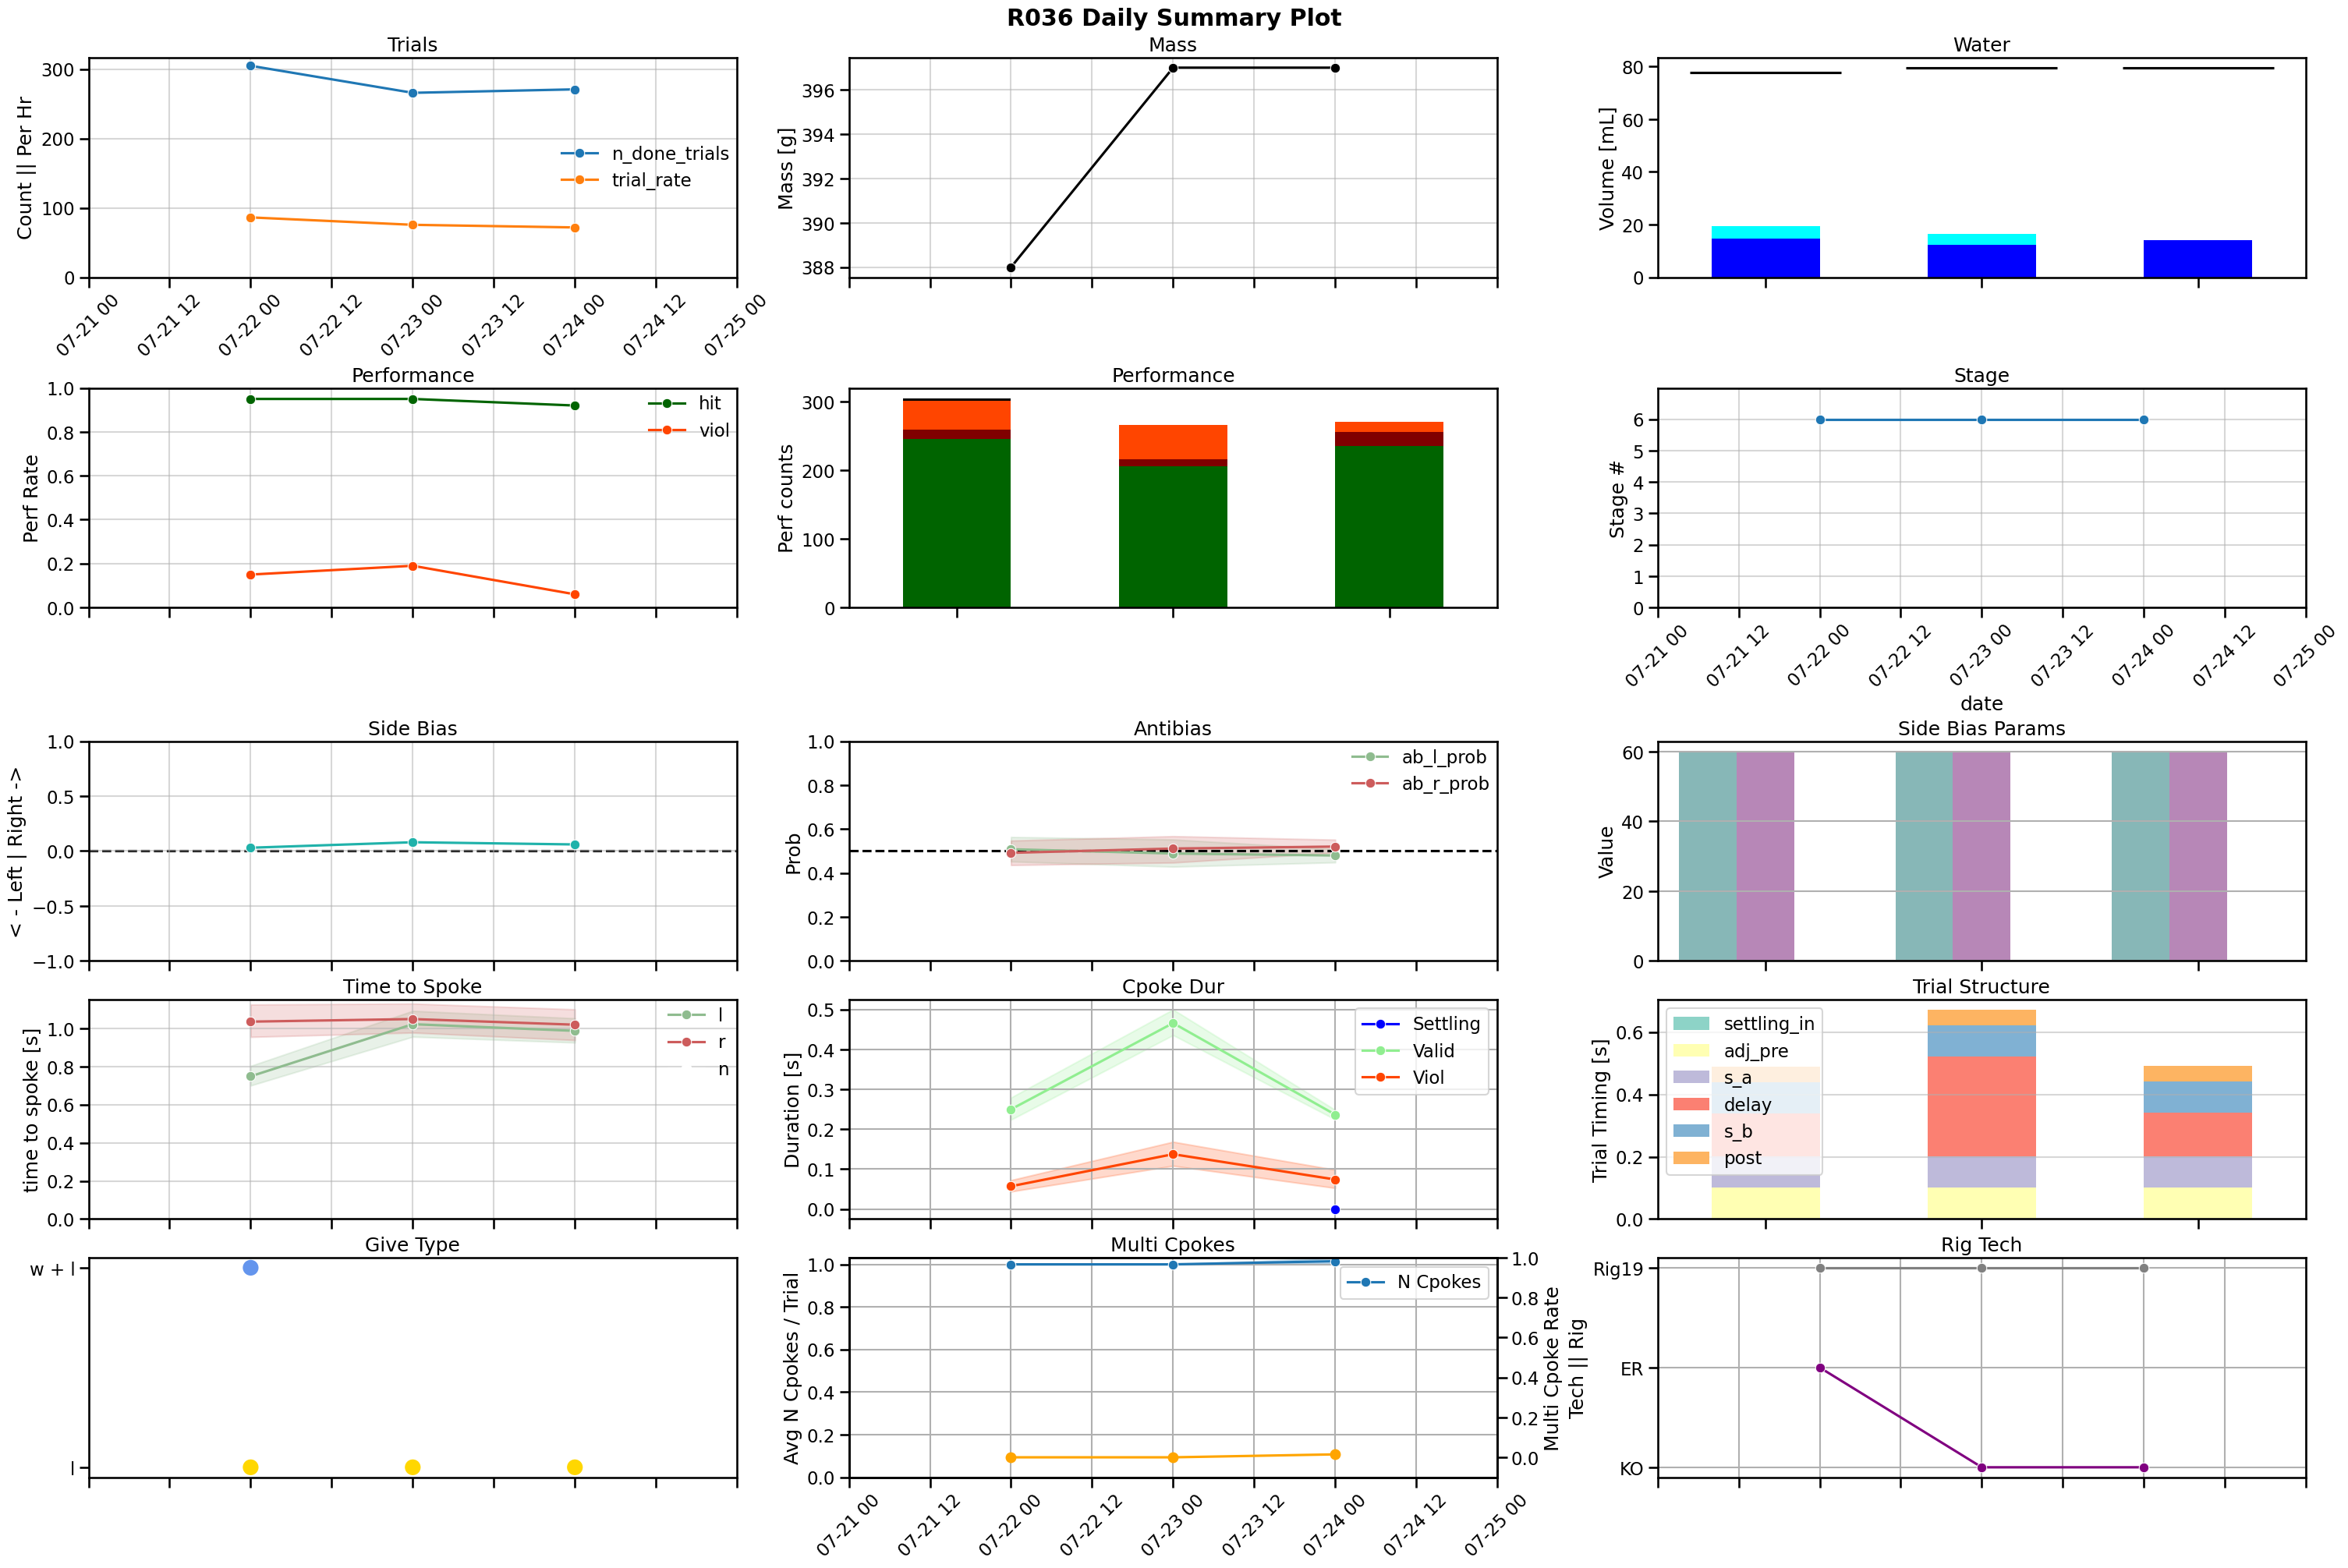

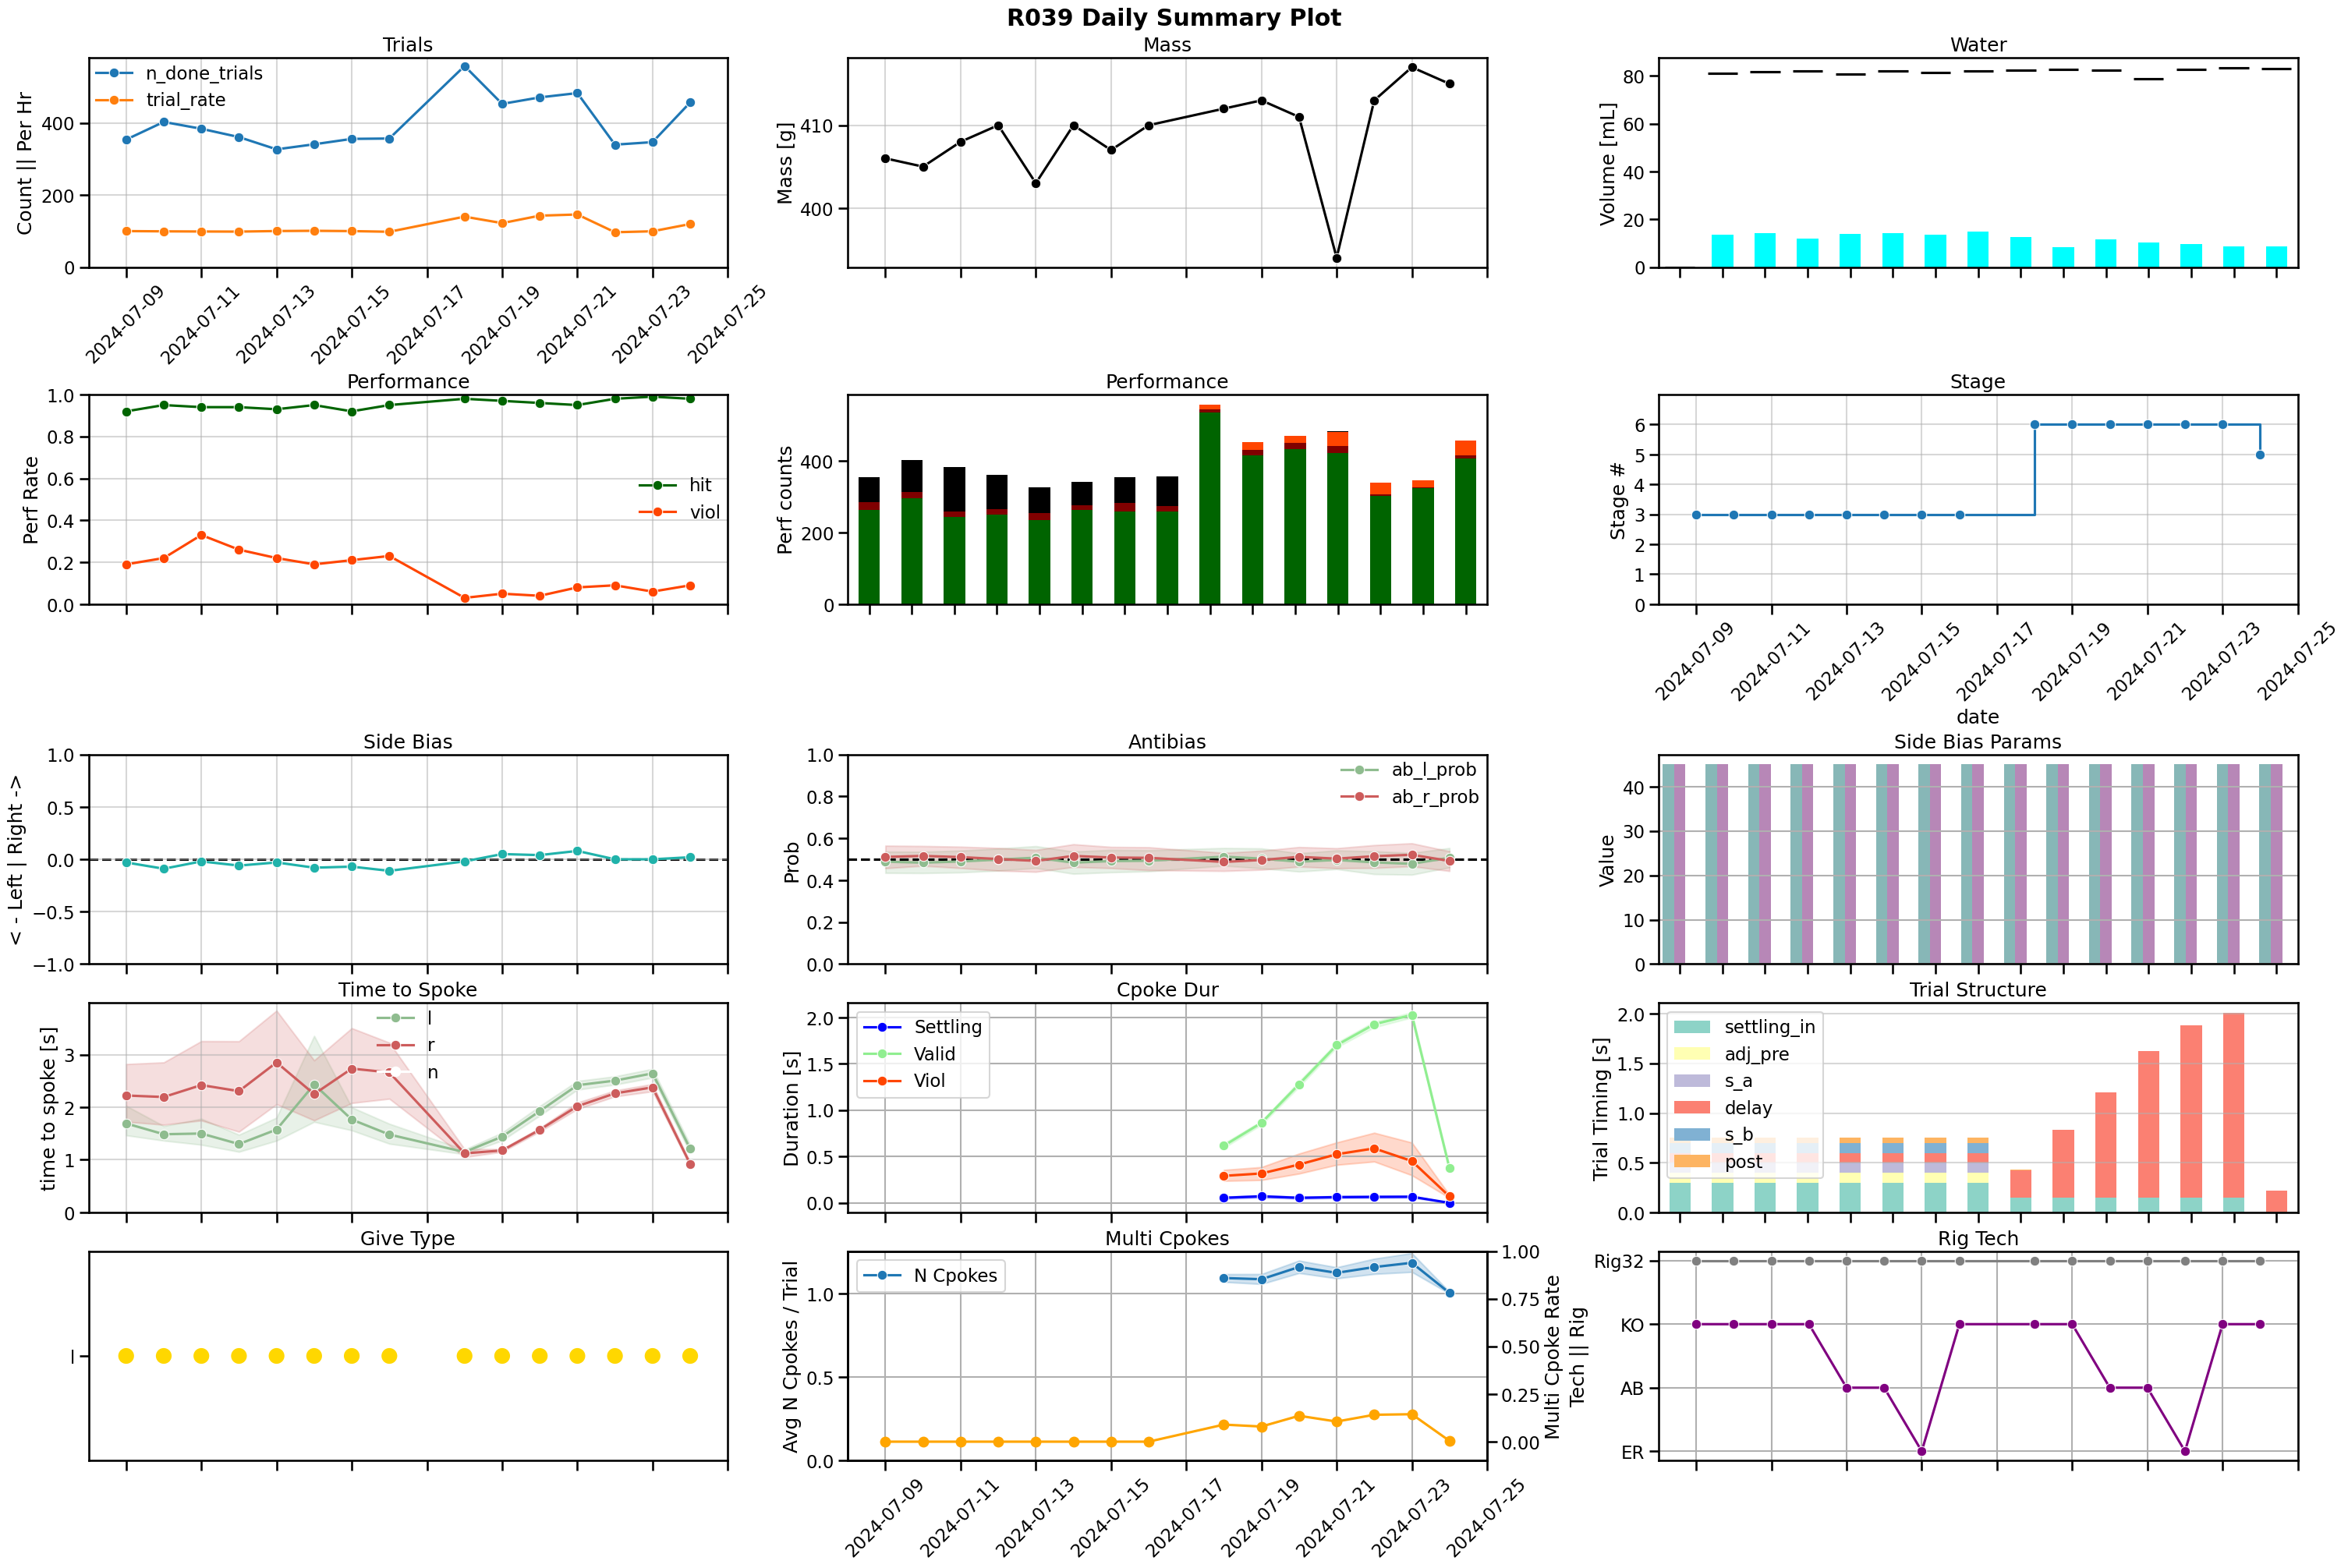

In [3]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [4]:
viz.summarize.single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R033_2024-07-24_day_summary
making R034_2024-07-24_day_summary
skipping failed cpokes plots due to hist error
making R036_2024-07-24_day_summary
making R039_2024-07-24_day_summary
making R010_2024-07-25_day_summary
making R012_2024-07-25_day_summary


## Spoke Violations

# Dev

In [ ]:
for date, df in trials_df.groupby("date"):
    pass

In [ ]:
bool(df.settling_in_determines_fixation.iloc[0])

True

In [ ]:
viz.plot_trials_info.plot_avg_valid_cpoke_dur?

Signature:
viz.plot_trials_info.plot_avg_valid_cpoke_dur(
    trials_df,
    ax,
    mode='settling_in',
)
Docstring:
plot avg valid cpoke dur for per trial

params
------
trials_df : DataFrame
    trials dataframe with columns `cpoke_dur`
    with trials as row index
ax : matplotlib.axes
    axis to plot to
File:      ~/Desktop/github/jbreda_animal_training/src/behav_viz/visualize/plot_trials_info.py
Type:      function

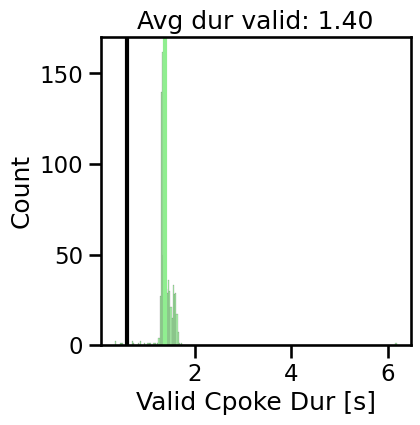

In [ ]:
from matplotlib import pyplot as plt

fig, ax = viz.plot_utils.make_fig("s")
viz.plot_trials_info.plot_avg_valid_cpoke_dur(df, ax, mode="violations")

In [ ]:
plot_avg_failed_cpoke_dur?

Object `plot_avg_failed_cpoke_dur` not found.


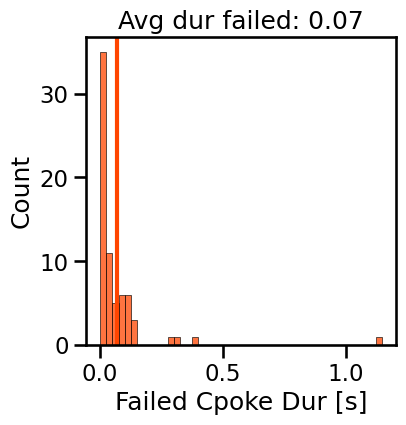

In [ ]:
from behav_viz.visualize.FixationGrower.single_day_plots import *

plot_avg_failed_cpoke_dur(df)

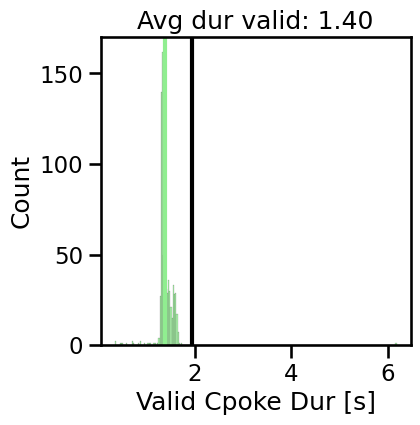

In [ ]:
plot_avg_valid_cpoke_dur(df)